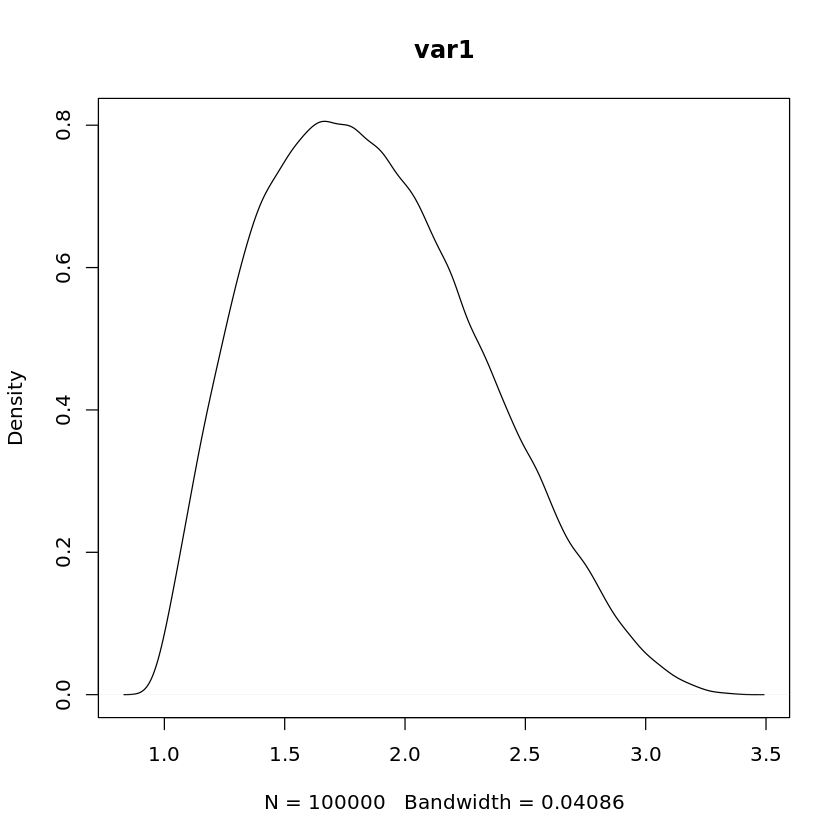

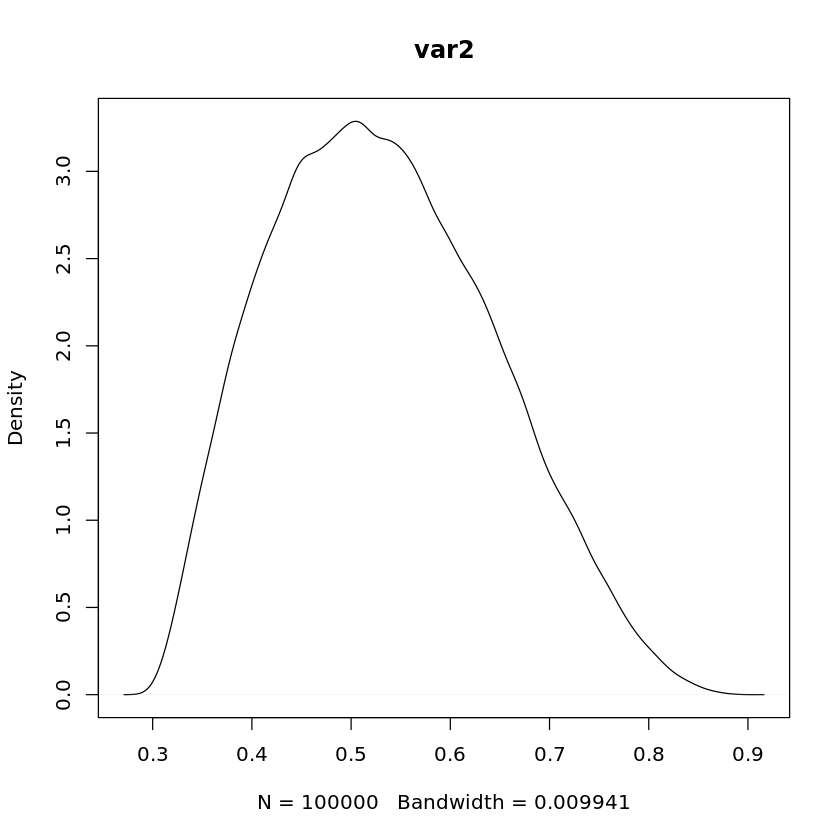

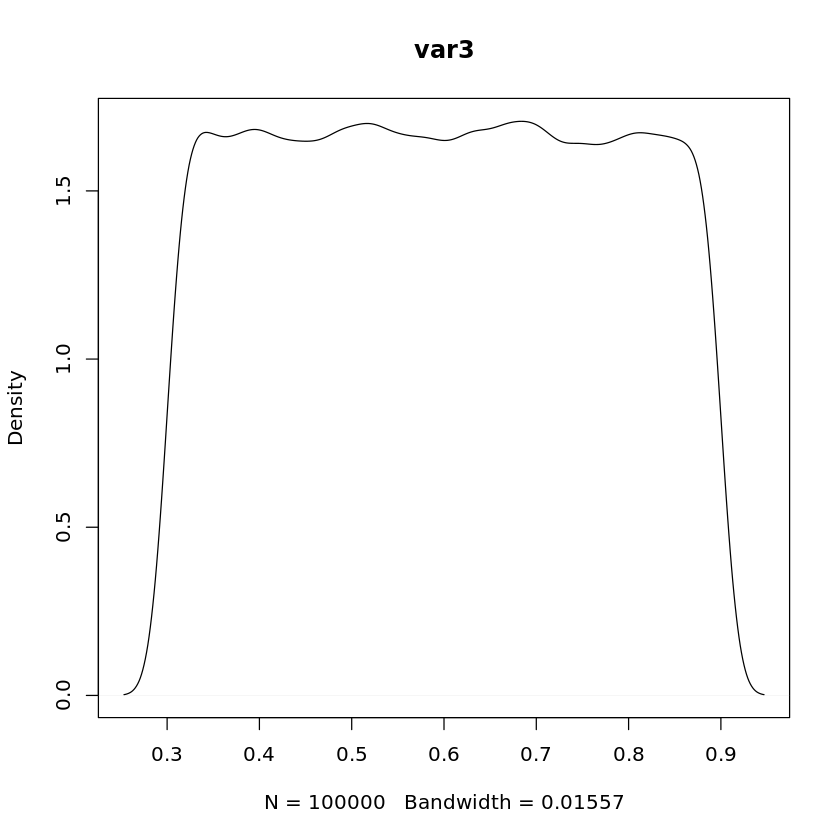

$percentage_overbudget
[1] 0.85167

$quantiles
      5%      95% 
434.4030 976.9929 

$mean_outcome
[1] 680.7228

$median_outcome
[1] 666.5108



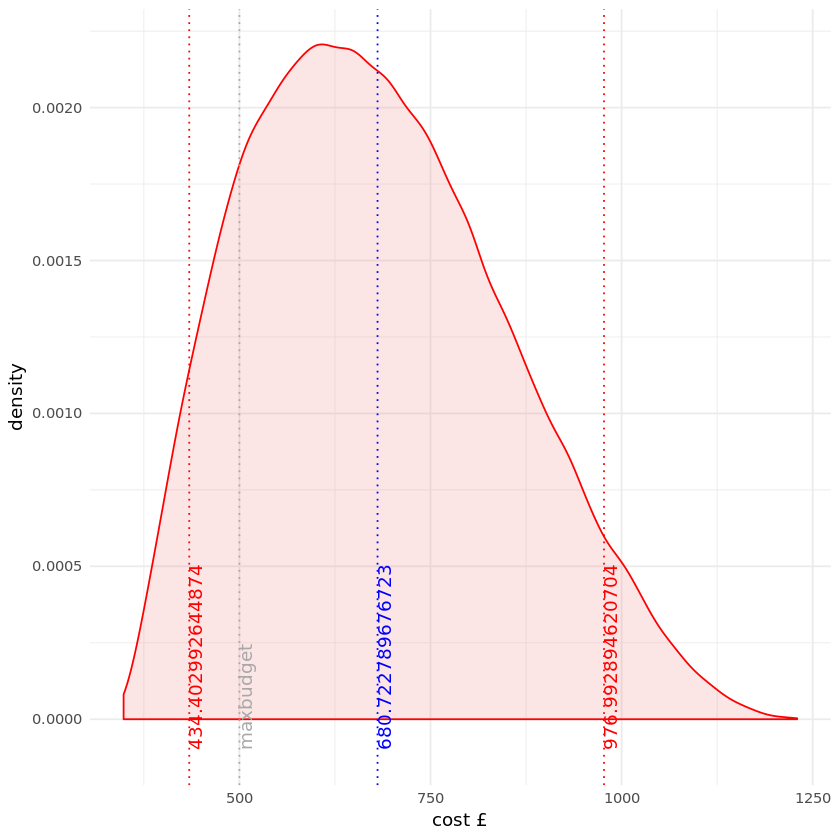

In [13]:
# install.packages("mc2d") # RUN THIS ONCE (remove the starting #, run it, then put it back)
library(mc2d) # For the distributions
library(ggplot2) # For visualisation
library(dplyr) # For combine, bind_rows

### VARIABLES YOU CAN CHANGE ###

nruns <- 100000 # Change me to change the number of simulation runs
maxbudget <- 500 # Change me to change your maximum budget [a]
units_of_answer <- "£"

# Distribution 1 ## Write here what this is: coffee price [b]
var1_Expected <- 1.7 # change me to a number 
var1_Best    <- 0.95 # change me to a number
var1_Worst   <- 3.45 # change me to the worst case scenario cost
var1_95percent <- 0.8 # 95% of dists would not be deviate from the mean by more/less than.

# Distribution 2 ## Write here what this is: treat price [c]
var2_Expected <- 2 # change me to a number
var2_Best    <- 1 # change me to a number
var2_Worst   <- 3 # change me to a number
var2_95percent <- 0.5 # 95% of dists would not be deviate from the mean by more/less than.

# Distribution 3 ## Write here what this is: syrup price [d]
var3_Expected <- 0.5 # change me to a number
var3_Best    <- 0.3 # change me to a number
var3_Worst   <- 0.9 # change me to a number
var3_95percent <- 0.2 # 95% of dists would not be deviate from the mean by more/less than.


### DISTRIBUTIONS ###
#Don't edit these, but look at what they are. These are the four distribution types we can choose from
# Triangle distributions /\
tri1 <- rtriang(n = nruns, min = var1_Best, max = var1_Worst, mode = var1_Expected)
tri2 <- rtriang(n = nruns, min = var2_Best, max = var2_Worst, mode = var2_Expected)
tri3 <- rtriang(n = nruns, min = var3_Best, max = var3_Worst, mode = var3_Expected)
# Truncated normal distributions |^\
truncnorm1 <- rtrunc(distr=rnorm, n = nruns, mean = var1_Expected, linf = 0, sd = var1_95percent/2)
truncnorm2 <- rtrunc(distr=rnorm, n = nruns, mean = var2_Expected, linf = 0, sd = var2_95percent/2)
truncnorm3 <- rtrunc(distr=rnorm, n = nruns, mean = var3_Expected, linf = 0, sd = var3_95percent/2)
# Uniform distributions _---_
uniform1 <- runif(n = nruns, min = var1_Best, max = var1_Worst)
uniform2 <- runif(n = nruns, min = var2_Best, max = var2_Worst)
uniform3 <- runif(n = nruns, min = var3_Best, max = var3_Worst)
# Beta Pert Distibutions (like curvy triangle distributions) 
pert1 <- rpert(n = nruns, min=var1_Best, mode=var1_Expected, max=var1_Worst, shape=4)
pert2 <- rpert(n = nruns, min=var2_Best, mode=var2_Expected, max=var2_Worst, shape=4)
pert3 <- rpert(n = nruns, min=var3_Best, mode=var3_Expected, max=var3_Worst, shape=4)

## EDIT THIS SECTION ##
# This is the section you edit to change the distribution for var1, var2, and the revenue
results <- list()
results$var1 <- pert1 # EDIT to change the distribution of variable 1 [e]
results$var2 <- pert3 # EDIT to change the distribution of variable 2 [f]
results$var3 <- uniform3 # EDIT to change the distribution of variable 2 [g]

## EDIT THIS SECTION ##
# This is the section you edit to specify your model
results$outcome <- 365*((results$var1)) 
                        # + (results$var2) + (results$var3)) # EDIT  what are you trying to estimate? [h]
## If you are only using two variables, comment out with a # the whole line of the one you aren't using

### Create Statistics ### do not edit unless you want to add more statistics and you're feeling confident
stats <- list()
stats$percentage_overbudget <- sum(results$outcome > maxbudget)/nruns
stats$quantiles <- quantile(results$outcome, probs = c(0.05, 0.95))
stats$mean_outcome <- mean(results$outcome)
stats$median_outcome <- median(results$outcome)

### Creating some data objects and variables to simplify our plotting  ### no need to edit unless you want to enhance
MCoutcomes <- data.frame(MCoutcomes = combine(results$outcome))

# make plot of input distributions
plot(density(results$var1), main="var1")
plot(density(results$var2), main="var2")
plot(density(results$var3), main="var3")

### Make plot of expected outcomes
ggplot(MCoutcomes) +
  geom_density(aes(x = MCoutcomes), alpha = 0.2, color = "red", fill = "lightcoral") + 
  geom_vline(xintercept = maxbudget, color = "grey66", linetype = "dotted") +
  annotate("text", x= maxbudget, y = -0.0001, label = "maxbudget", angle = 90, vjust = 1, hjust=0, color = "grey66") +
  geom_vline(xintercept = mean(results$outcome), color = "blue", linetype = "dotted") +
  annotate("text", x= mean(results$outcome), y = -0.0001, label=mean(results$outcome), angle = 90, vjust = 1, hjust=0, color = "blue") +
  geom_vline(xintercept = quantile(results$outcome, probs = c(0.05)), color = "red", linetype = "dotted") +
  annotate("text", x= quantile(results$outcome, probs = c(0.05)), y = -0.0001, label=quantile(results$outcome, probs = c(0.05)), angle = 90, vjust = 1, hjust=0, color = "red") +
  geom_vline(xintercept = quantile(results$outcome, probs = c(0.95)), color = "red", linetype = "dotted") +
  annotate("text", x= quantile(results$outcome, probs = c(0.95)), y = -0.0001, label=quantile(results$outcome, probs = c(0.95)), angle = 90, vjust = 1, hjust=0, color = "red") +
  theme_minimal() +
  labs(x = paste("cost", units_of_answer))

### Print stats
print(stats)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in binomial * ((results$var1) + pert2 * results$var2 + 10 * results$var3): non-numeric argument to binary operator
